In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
data=pd.read_csv('/content/drive/MyDrive/DL/Part 1 - Artificial Neural Networks/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
X=data.iloc[:,3:-1].values
y=data.iloc[:,-1].values

In [6]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [7]:
print(y)

[1 0 1 ... 1 1 0]


##Encoding categorical data

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [9]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


##Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

## Building the ANN

In [14]:
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout

#### Initializing the ANN

In [15]:
model=Sequential()

#### Adding the input layer and the first hidden layer

In [16]:
model.add(Dense(units=6,activation="relu",kernel_initializer='he_uniform',input_dim=12))

#### Adding the input layer and the second hidden layer

In [17]:
model.add(Dense(units=6,activation="relu",kernel_initializer='he_uniform'))

#### Adding the output layer

In [18]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

## Training the ANN

#### Compile model

In [19]:
model.compile(optimizer="Adamax",loss='binary_crossentropy',metrics=['accuracy'])


#### Training the ANN on the Training set

In [20]:
model_history=model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5966 - accuracy: 0.7539
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.7865
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7940
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7993
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.8014
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8049
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8056
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8074
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4454 - accura

##### list all data in history

In [21]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy'])


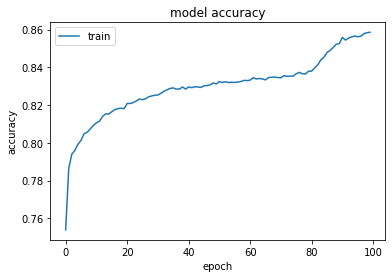

In [22]:
plt.plot(model_history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

In [24]:
print(model.predict(st.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


## Predicting the Test set results

In [25]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1533   62]
 [ 209  196]]


0.8645